## Adding self created Helper function for EDA and Data Preparations

## Data Source Citation

**Original Academic Source:**
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

**Dataset Source:** 
California Housing Prices Dataset, retrieved from Kaggle: https://www.kaggle.com/datasets/camnugent/california-housing-prices

**Data Collection Method:**
This dataset is derived from the 1990 California census data, containing information about housing characteristics across different California districts/block groups. The data represents a snapshot of the California housing market during the 1990 census period.

| Column | What it means |
|--------|---------------|
| `longitude`, `latitude` | Geographic centroid of each census block group |
| `housing_median_age` | Median age of houses in the block (years) |
| `total_rooms`, `total_bedrooms` | Counts of rooms / bedrooms in the block group |
| `population` | Number of residents in the block |
| `households` | Number of household units |
| `median_income` | Median income of households  |
| `median_house_value` | **Target** – median house price |
| `ocean_proximity` | Categorical proximity to coast |

#### 1. Project Topic Goal
- In this project I treat California Housing Prices as a supervised regression problem where the task is to predict median_house_value from block-level socio-economic features.

#### Goal

- accurate price models help planners, lenders and individual buyers understand housing affordability across California


In [2]:
!cp /kaggle/input/helpers/scikitlearn/default/1/data_prep.py .
!cp /kaggle/input/helpers/scikitlearn/default/1/eda.py .

In [3]:
import data_prep # This module contains user-defined functions for data preparation
import eda # This module contains user-defined functions for Exploratory data analysis

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
from pathlib import Path
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)

In [4]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

* Before starting the EDA I am going to create a test set.

In [5]:
#train, test = train_test_split(df, train_size=0.8)

# Data Wrangling


 * I defined customs like this one below, you can find those functions in the helpers folder.

In [6]:
def check_df(dataframe, head=5, tail=5, detail=False):
    """
    It gives general sight of dataframe objects.
    Parameters
    ----------
    dataframe: dataframe
        dataframe from which variable(column) names are to be retrieved.
    head: int, default 5
        It determines that how many of the first rows will print.
    tail: int,  default 5
        It determines that how many of the last rows will print.
    detail: boolean, default False
        It gives quantiles values
    Returns
    -------
        this is function don't return anything.It just prints summarized values
    Examples
    ------
    import seaborn as sns
    df = sns.load_dataset("tips")
    print(check_df(df,detail=True))
    """

    print("##################### Index #####################")
    print(dataframe.index)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Total NA #####################")
    print(dataframe.isnull().sum().sum())
    if detail:
        print("##################### Quantiles #####################")
        print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
        print("##################### Describe #####################")
        print(dataframe.describe().T)

In [8]:
check_df(df, head=5, tail=5)

##################### Index #####################
RangeIndex(start=0, stop=20640, step=1)
##################### Shape #####################
(20640, 10)
##################### Types #####################
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
##################### Head #####################
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88               41.00       880.00          129.00   
1    -122.22     37.86               21.00      7099.00         1106.00   
2    -122.24     37.85               52.00      1467.00          190.00   
3    -122.25     37.85               52.00      1274.00          235.00   
4    -122.25     37.85               52.00      1627.00     

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.00,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20640.00,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.00,28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,20640.00,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00
total_bedrooms,20433.00,537.87,421.39,1.00,296.00,435.00,647.00,6445.00
population,20640.00,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
households,20640.00,499.54,382.33,1.00,280.00,409.00,605.00,6082.00
median_income,20640.00,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,20640.00,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00


# Comments
## Quality
- The California housing dataset contains 20,640 observations with 10 features, representing housing information across different districts in California.

- Shape: 20,640 rows and 10 columns
- Missing values: Only 207 missing values in total_bedrooms
- Data types are appropriate - numeric variables stored as float64 and categorical variable (ocean_proximity) as object, it should convert it to categorical. 
- Housing median age ranges from 1 to 52 years.
- Median house values show big variation (min: 14,999$, max : $500,001), suggesting the dataset captures both affordable and expensive houses
- Population density varies significantly across districts (city and rural areas probably)
- No negative values which is nice
## Issues Identified
- 207 missing values in total_bedrooms
- ocean_proximity has object data type, it should convert it to categorical. 
## Next steps
1. Convert ocean_proximity to category
2. Impute the 207 missing total_bedrooms values maybe using the median for each block group
3. Engineer a few new features
   - rooms per household equals total_rooms divided by households
   - bedrooms per room equals total_bedrooms divided by total_rooms
   - population per household equals population divided by households
   


# First Data Cleaning

* In this first phase data cleaning I am going fic immeadite issues on my dataset, After EDA I will more data cleaning if it necessary

# Define
* ocean_proximity has object value for proper analysis I convert it to categorical type clearer semantic representation

In [10]:
df["ocean_proximity"] = df["ocean_proximity"].astype("category")

# Test

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


# Exploratory Data Analysis

- I defined this function('grab_col_names') to separate column types into three groups:
    - 1. cat_cols represents the categorical columns.
    - 2. num_cols represents the quantitative columns.
    - 3. cat_but_car represents the categorical but cardinal columns which repeat so many times, unlike usual categorical columns.

Of course, this function has thresholds for each case it can be set with its arguments.
- Separating column types is crucial for data visualization and interpretation.

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numeric, and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ----------
    dataframe: dataframe
        dataframe where variable names want to be imported
    cat_th: int, optional
        The threshold for those categorical variables with the numerical appearance
    car_th: int, optional
        The threshold those categorical but cardinal variables

    Returns
    -------
        cat_cols: list
            List of categorical variables
        num_cols: list
            list of numerical variables
        cat_but_car: list
            list of categorical but cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total variables
       The cat_cols contains the num_but_cat in

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [14]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

Observations: 20640
Variables: 10
cat_cols: 1
num_cols: 9
cat_but_car: 0
num_but_cat: 1


In [15]:
print(cat_cols)

['ocean_proximity']


## Analyzing the numerical columns
Here I defined the 'num_summary' and 'cat_summary' functions to analyze categorical and numerical variables.

In [18]:
def num_summary(dataframe, numerical_col, plot=False, plot_type="hist"):
    """
     It summarizes the categorical variables in the dataset
    Parameters
        ----------
        dataframe: dataframe
            dataframe from which variable(column) names are to be retrieved.
        numerical_col: string
        plot: boolean (default=False)
            It makes default histogram graph.
        plot_type : string ( (default=hist) , hist or boxplot)
            It makes defaultly histogram graph you can change it to "boxplot" to make for box plot graph
    Examples
    ------
    import seaborn as sns
    df = sns.load_dataset("tips")
    print(num_summary(df, "tip", plot=True))
    """

    print("##################### Describe #####################")
    print(dataframe[numerical_col].describe(), "\n\n")
    print("##################### Total NA #####################")
    print(dataframe.isnull().sum().sum())
    if plot:
        if plot_type == "hist":
            dataframe[numerical_col].hist(bins=30)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show()

        elif plot_type == "box_plot":
            sns.boxplot(x=dataframe[numerical_col])
            plt.xlabel(numerical_col)
            plt.title(numerical_col)
            plt.show()
        else:
            print("Please enter the correct graph name!!!")

def cat_summary(dataframe, col_name, plot=False):
    """
    It summarizes the categorical variables in the dataset
    Parameters
    ----------
    dataframe: dataframe
        dataframe from which variable(column) names are to be retrieved.
    col_name: string
        categorical column name in dataframe
    plot : boolean
        This is the optional selection to make a boxplot graph.

    Examples
    ------
    import seaborn as sns
    df = sns.load_dataset("tips")
    print(cat_summary(df, "sex", plot=True))
    """

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [16]:
print(num_cols)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


                 ocean_proximity  Ratio
ocean_proximity                        
<1H OCEAN                   9136  44.26
INLAND                      6551  31.74
NEAR OCEAN                  2658  12.88
NEAR BAY                    2290  11.09
ISLAND                         5   0.02
##########################################


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


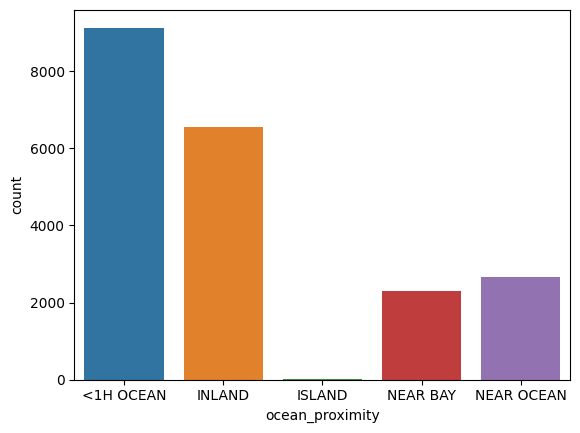

In [19]:
cat_summary(df,'ocean_proximity', plot=True)

- almost half of the block groups are within one hour of the ocean
- about one third of them are inland
- the ISLAND category is practically nonexistent
- NEAR OCEAN and NEAR BAY together account for roughly 24 %
## Next steps
1. one-hot encode for this varible in data cleaning process
2.  I am going to drop ISLAND because it is too rare.
3.  Compare them with median_house_value 

##################### Describe #####################
count   20640.00
mean     -119.57
std         2.00
min      -124.35
25%      -121.80
50%      -118.49
75%      -118.01
max      -114.31
Name: longitude, dtype: float64 


##################### Total NA #####################
207


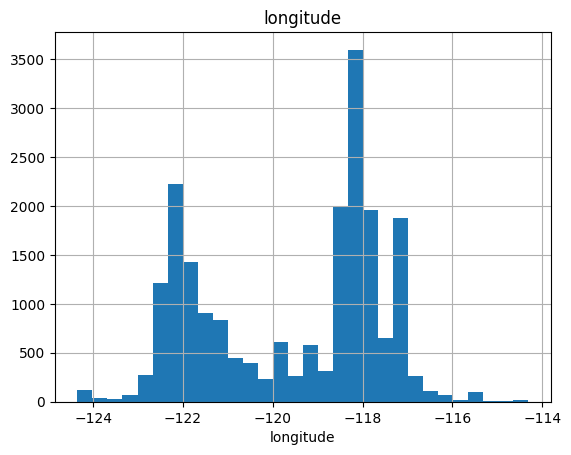

##################### Describe #####################
count   20640.00
mean       35.63
std         2.14
min        32.54
25%        33.93
50%        34.26
75%        37.71
max        41.95
Name: latitude, dtype: float64 


##################### Total NA #####################
207


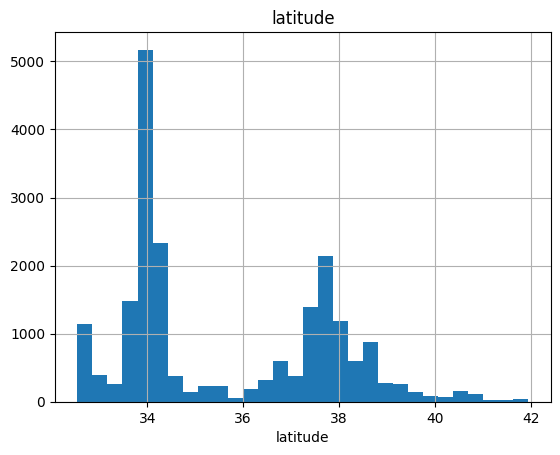

##################### Describe #####################
count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64 


##################### Total NA #####################
207


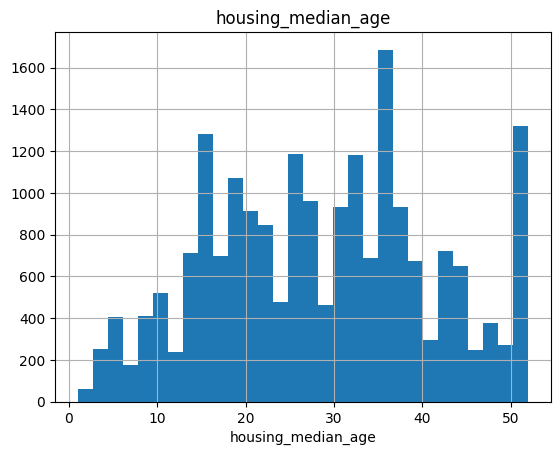

##################### Describe #####################
count   20640.00
mean     2635.76
std      2181.62
min         2.00
25%      1447.75
50%      2127.00
75%      3148.00
max     39320.00
Name: total_rooms, dtype: float64 


##################### Total NA #####################
207


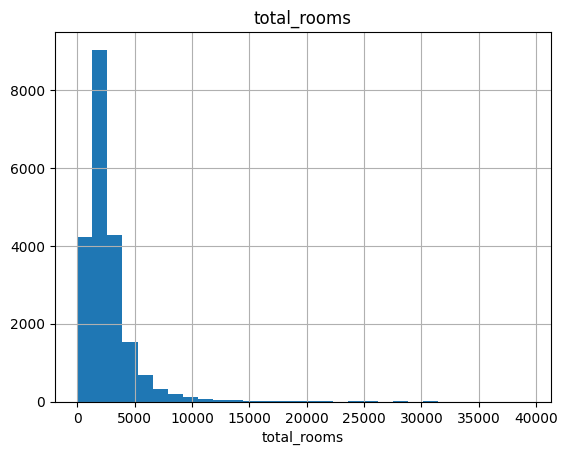

##################### Describe #####################
count   20433.00
mean      537.87
std       421.39
min         1.00
25%       296.00
50%       435.00
75%       647.00
max      6445.00
Name: total_bedrooms, dtype: float64 


##################### Total NA #####################
207


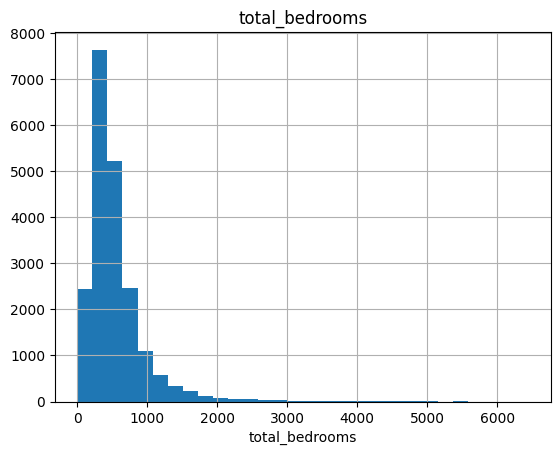

##################### Describe #####################
count   20640.00
mean     1425.48
std      1132.46
min         3.00
25%       787.00
50%      1166.00
75%      1725.00
max     35682.00
Name: population, dtype: float64 


##################### Total NA #####################
207


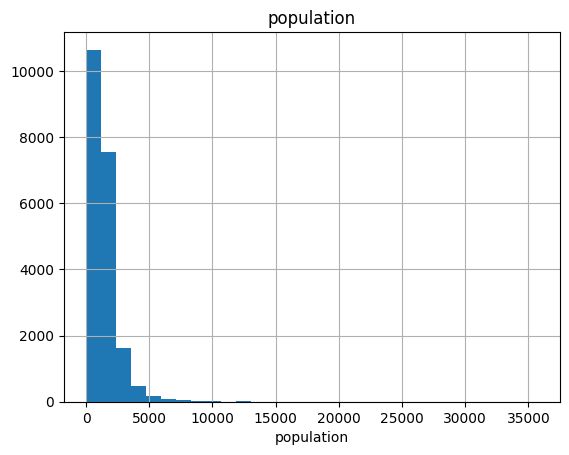

##################### Describe #####################
count   20640.00
mean      499.54
std       382.33
min         1.00
25%       280.00
50%       409.00
75%       605.00
max      6082.00
Name: households, dtype: float64 


##################### Total NA #####################
207


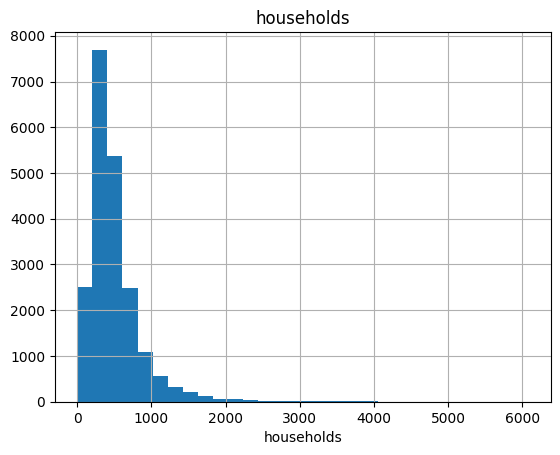

##################### Describe #####################
count   20640.00
mean        3.87
std         1.90
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        15.00
Name: median_income, dtype: float64 


##################### Total NA #####################
207


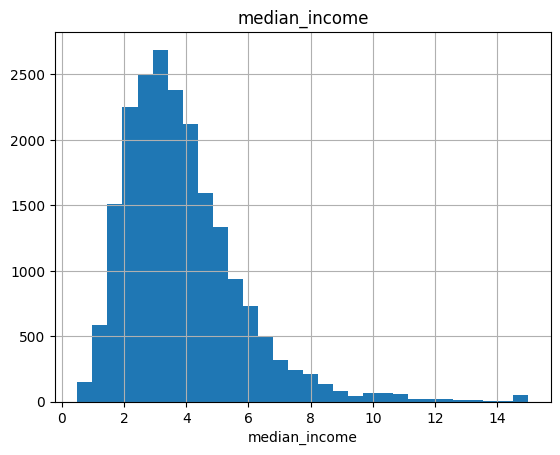

##################### Describe #####################
count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64 


##################### Total NA #####################
207


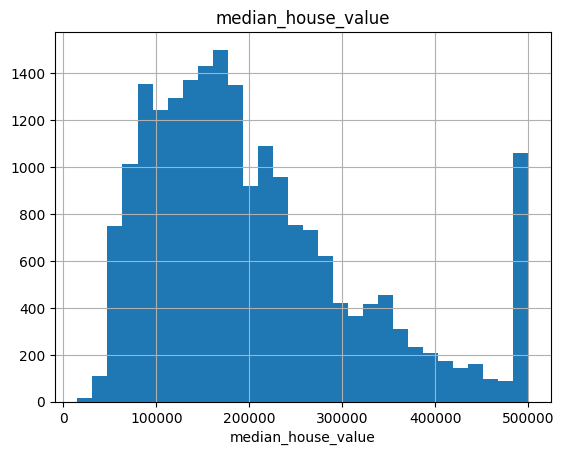

In [20]:
for col_name in num_cols:
    num_summary(df, col_name, plot=True)

# **Interpretation of Summary Statistics
**notes:** after making a search on google, I found that; median income, housing median age, and median house value were capped. So our model will never learn these right because we dont know the real values.  We have two options; we can remove those capped values or find correct values. (We can clearly observe capped values on histograms)

- Majority of our variables are skewed right; this situation might be problem for our machine learning models, in the future we will transfrom these to make them more like bell shape(normal distribution)


### Outlier Analysis

- The 'check_outlier' function checks if there are any outlier values in the specified column of a DataFrame based on quantile thresholds.
- Checks if there are any outlier values in the specified column of a data frame based on quantile thresholds.

In [22]:
## These functions I created for outlier anaylsis...
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Calculates the lower and upper thresholds for outlier detection based on quartile ranges.
    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame containing the column to compute outlier thresholds.
    - col_name (str): The name of the column in the DataFrame for which to calculate outlier thresholds.
    - q1 (float, optional): The percentile value for the first quartile. Defaults to 0.25.
    - q3 (float, optional): The percentile value for the third quartile. Defaults to 0.75.

    Returns:
    - tuple: A tuple containing the lower and upper thresholds for outliers. """

    series = dataframe[col_name].dropna()
    lower_q = series.quantile(q1)
    upper_q = series.quantile(q3)
    iqr = upper_q - lower_q
    up_limit = upper_q + 1.5 * iqr
    low_limit = lower_q - 1.5 * iqr
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Checks if there are any outlier values in the specified column of a DataFrame based on quantile thresholds.

    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame to check for outliers.
    - col_name (str): The name of the column in which to search for outliers.
    - q1 (float, optional): The lower quantile to use for calculating the outlier detection threshold. Defaults to 0.25.
    - q3 (float, optional): The upper quantile to use for calculating the outlier detection threshold. Defaults to 0.75.

    Returns:
    - bool: True if outliers are found in the specified column; False otherwise. 
    """
    if not pd.api.types.is_numeric_dtype(dataframe[col_name]):
        print(f"Skipping {col_name}: not numeric")
        return False

    series = dataframe[col_name].dropna()
    if series.empty:
        return False

    low, up = outlier_thresholds(dataframe, col_name, q1, q3)
    mask = (series < low) | (series > up)
    return mask.any()

In [23]:
outliers = []
for col_name in num_cols:
    result = check_outlier(df, col_name, q1=0.01, q3=0.99)
    if result == True:
        outliers.append(col_name)
print(outliers)        

['total_rooms', 'total_bedrooms', 'population', 'households']


* For outlier analysis I will this function with box plot

##################### Describe #####################
count   20640.00
mean     -119.57
std         2.00
min      -124.35
25%      -121.80
50%      -118.49
75%      -118.01
max      -114.31
Name: longitude, dtype: float64 


##################### Total NA #####################
207


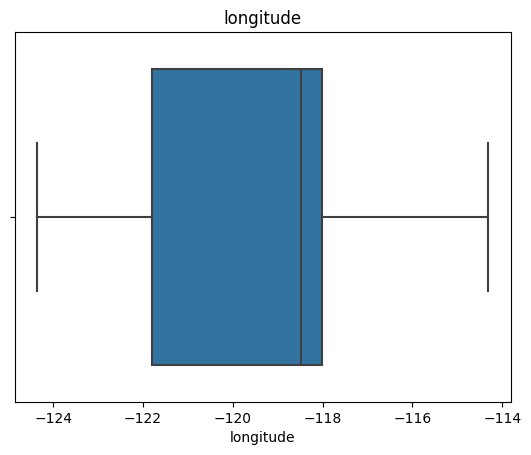

##################### Describe #####################
count   20640.00
mean       35.63
std         2.14
min        32.54
25%        33.93
50%        34.26
75%        37.71
max        41.95
Name: latitude, dtype: float64 


##################### Total NA #####################
207


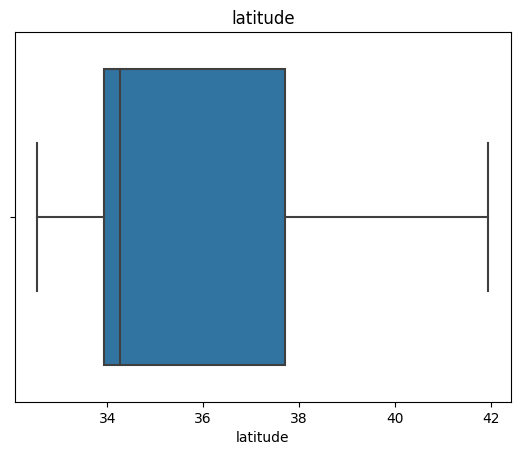

##################### Describe #####################
count   20640.00
mean       28.64
std        12.59
min         1.00
25%        18.00
50%        29.00
75%        37.00
max        52.00
Name: housing_median_age, dtype: float64 


##################### Total NA #####################
207


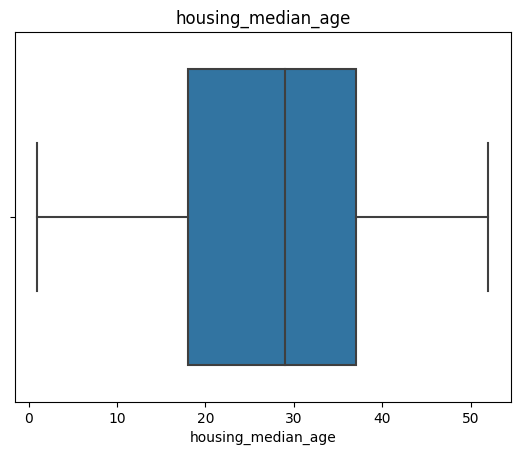

##################### Describe #####################
count   20640.00
mean     2635.76
std      2181.62
min         2.00
25%      1447.75
50%      2127.00
75%      3148.00
max     39320.00
Name: total_rooms, dtype: float64 


##################### Total NA #####################
207


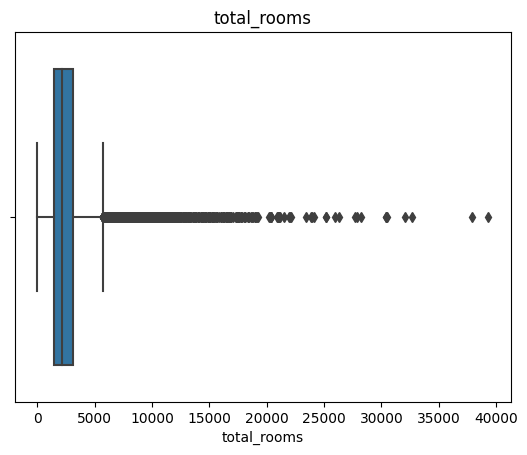

##################### Describe #####################
count   20433.00
mean      537.87
std       421.39
min         1.00
25%       296.00
50%       435.00
75%       647.00
max      6445.00
Name: total_bedrooms, dtype: float64 


##################### Total NA #####################
207


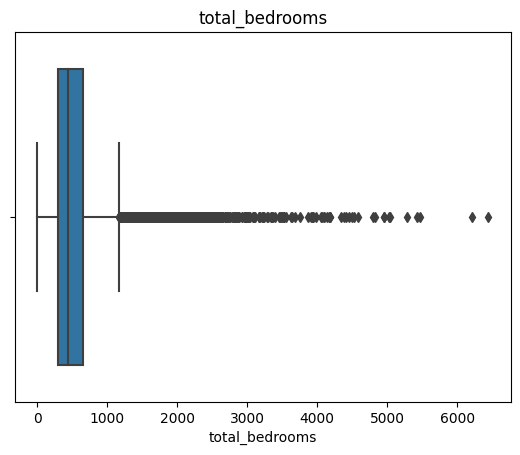

##################### Describe #####################
count   20640.00
mean     1425.48
std      1132.46
min         3.00
25%       787.00
50%      1166.00
75%      1725.00
max     35682.00
Name: population, dtype: float64 


##################### Total NA #####################
207


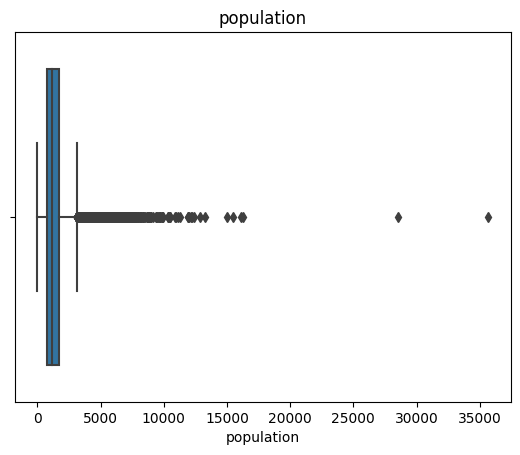

##################### Describe #####################
count   20640.00
mean      499.54
std       382.33
min         1.00
25%       280.00
50%       409.00
75%       605.00
max      6082.00
Name: households, dtype: float64 


##################### Total NA #####################
207


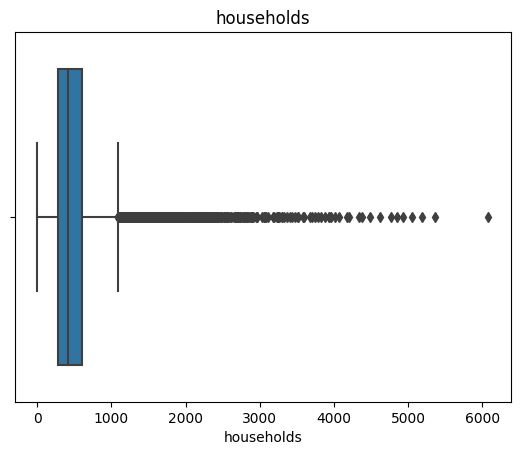

##################### Describe #####################
count   20640.00
mean        3.87
std         1.90
min         0.50
25%         2.56
50%         3.53
75%         4.74
max        15.00
Name: median_income, dtype: float64 


##################### Total NA #####################
207


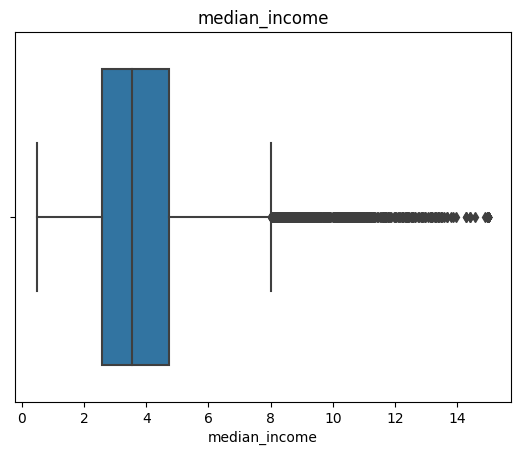

##################### Describe #####################
count    20640.00
mean    206855.82
std     115395.62
min      14999.00
25%     119600.00
50%     179700.00
75%     264725.00
max     500001.00
Name: median_house_value, dtype: float64 


##################### Total NA #####################
207


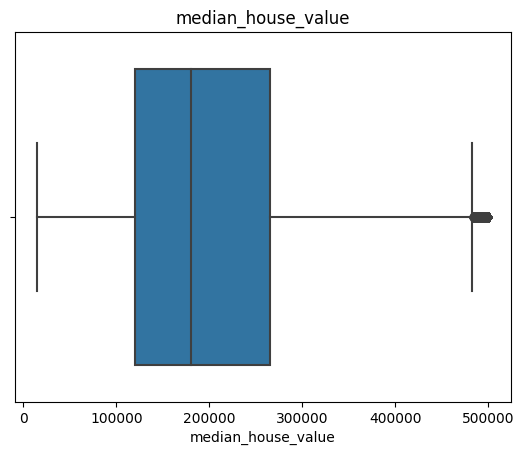

In [24]:
for col_name in num_cols:
    num_summary(df, col_name, plot=True, plot_type="box_plot")

Here these variables listed seem as outliers: total_rooms, total_bedrooms, population,  households, median_income, median_house_value

### Helper functions 

In [25]:
def target_summary_with_cat(dataframe, target, categorical_col):
    """
    It gives the proportion and number of observation unit of the categorical variable about the target variable
    Parameters
    ----------
    dataframe: dataframe
        dataframe where variable names want to be imported
    target: string
        The target variable name which you want examine with columns
    categorical_col: string
        The column name which you want examine with target variable
    Examples
    ----------
    import seaborn as sns
    df = sns.load_dataset("titanic")
    target_summary_with_cat(df, "survived", "sex")
    """
    print("##################### ["+categorical_col +"] #####################")
    print(pd.DataFrame(dataframe.groupby(categorical_col).agg({target: "mean",
                                                               categorical_col: "count"})), end="\n")
    print("##################################################")



def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    """
    It catches the high-correlated variables in your data set.
    Parameters
    ----------
    dataframe: dataframe
        dataframe where variable names want to be imported
    plot: boolean (default False)
        This is the optional selection to make a heatmap graph
    corr_th: float optional
        This argument determines the correlation threshold
    Returns
    -------
    drop_list: list
        List of high correlative variables. (default=0.90)
    Examples
    ----------
    import seaborn as sns
    df = sns.load_dataset("breast_cancer")
    high_correlated_cols(df, plot=False, corr_th=0.90)
    """

    corr = dataframe.corr().abs()
    # use built-in bool instead of np.bool
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    drop_list = [col for col in upper.columns if any(upper[col] > corr_th)]
    
    if plot:
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.title("Feature Correlation Matrix")
        plt.show()
    
    return drop_list

### Variable analysis with Target variable

In [26]:
target_summary_with_cat(df, 'median_house_value', 'ocean_proximity')

##################### [ocean_proximity] #####################
                 median_house_value  ocean_proximity
ocean_proximity                                     
<1H OCEAN                 240084.29             9136
INLAND                    124805.39             6551
ISLAND                    380440.00                5
NEAR BAY                  259212.31             2290
NEAR OCEAN                249433.98             2658
##################################################


/tmp/ipykernel_48/1677919473.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame(dataframe.groupby(categorical_col).agg({target: "mean",


## median_house_value by ocean_proximity
- `<1H OCEAN`: 9 136 observations, avg : 240 084  
- `INLAND`: 6 551 observations, avg : 124 805  
- `ISLAND`: 5 observations, avg : 380 440  
- `NEAR BAY`: 2 290 observations, avg : 259 212  
- `NEAR OCEAN`: 2 658 observations, avg : 249 434 

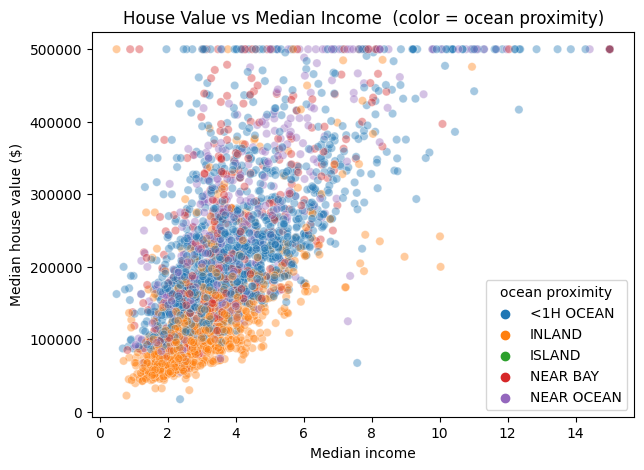

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df.sample(3000, random_state=42),
                x="median_income",
                y="median_house_value",
                hue="ocean_proximity",     
                alpha=0.4)
plt.title("House Value vs Median Income  (color = ocean proximity)")
plt.xlabel("Median income")
plt.ylabel("Median house value ($)")
plt.legend(title="ocean proximity")
plt.show()


- We can clearly observe capped median_house_value
- Inland areas are much cheaper on average
- we can observe low income household lives in inland in general.
- Proximity to ocean or bay clearly drives up house values
- “ISLAND” has the highest avg but only 5 rows—too small to trust 

### Correlation Analysis

In [28]:
df[num_cols].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


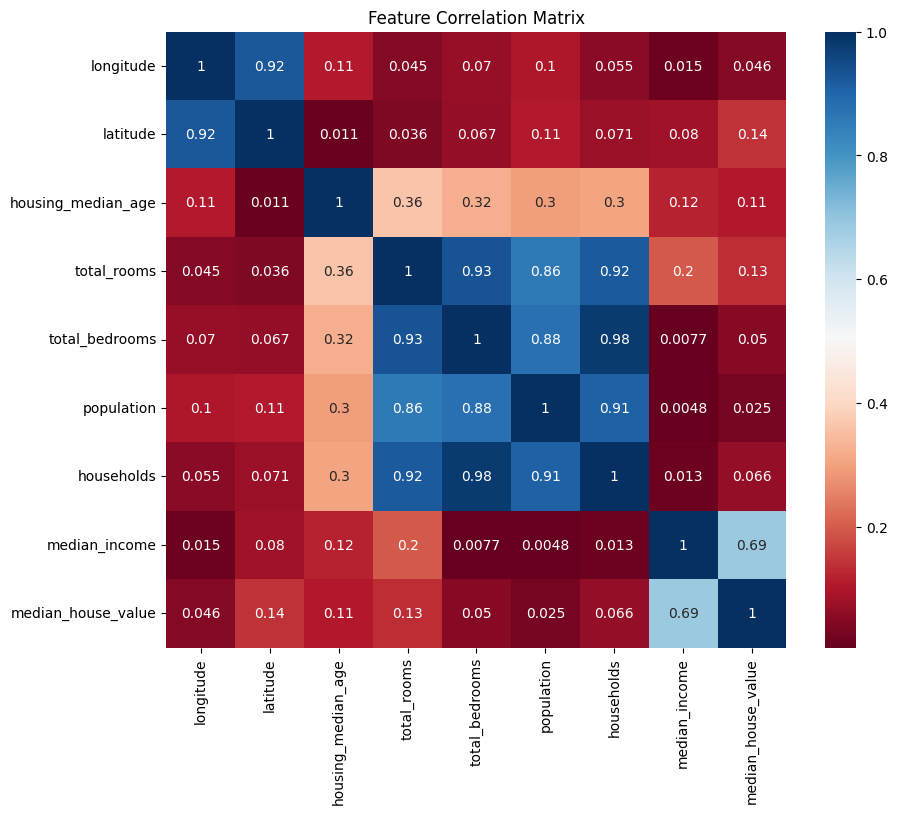

['latitude', 'total_bedrooms', 'households']

In [29]:
high_correlated_cols(df[num_cols], plot=True, corr_th=0.90)

### Comments
- Total rooms, bedrooms, population & households  
  - total_rooms–total_bedrooms (0.93),
  - total_rooms–households (0.92),
  - total_bedrooms–households (0.98),
  - population–households (0.91),
  - population–total_rooms (0.86),
  - population–total_bedrooms (0.88)  
  - These are all super high (>0.85), meaning these size features basically move together. A block group with more rooms almost always has more bedrooms, households and people.

- Housing median age 
  - Mild negative correlation with room counts and population (~ –0.30 to –0.36). Older neighborhoods tend to have fewer rooms and fewer residents on average.

- Median income & median house value (0.69)
  - A decent positive correlation. Higher-income areas generally have higher home values, though it’s not so extreme that one alone explains everything.


 - 'total_bedrooms', 'households' seems carry the same information,probably multicollinearity among them. 

## Interpretation of Summary Statistics  

*Note:* A quick Google search showed that **`median_income`, `housing_median_age`, and `median_house_value` are top-coded in this dataset**.  
Because the true upper values are hidden, the model can’t fully learn the extreme end of the market.  Two possible fixes would be (a) drop those capped rows or (b) hunt down uncapped values from another source.  For now I keep them and simply flag the limitation (the flat cut-offs are obvious in the histograms).

* Most numeric features are **right-skewed**.  Skew can confuse certain algorithms, so Iwill apply log transforms later to make the shapes more like bell.
* No negative numbers and only one feature (`total_bedrooms`) has missing values  which I will impute in the cleaning step.

---

### EDA Highlights  

* **Income drives price:** `median_income` has the highest linear correlation with price (ρ ≈ 0.69).   
* **Density effects:** Blocks with many **rooms per household** (i.e., larger homes) go for more, while very high **population per household** (crowded rentals) drags price down.  
* **Category insight:** The average house in `<1H OCEAN` areas costs roughly **2×** the average **INLAND** house.



### Data Cleaning

* total_bedrooms has missing values, this decision can be made by in general with domain knowledge and then decided to what to do? In general we can remove entire variable or drop the rows, other solution is assingin value like zero, median or mean values. In this example I am going to assign median value which is most frequent value. 

* I imputed median within (ocean_proximity, housing_age) groups to preserve granularity

In [172]:
# filling missing values with median value by similar characteristics
df['total_bedrooms'] = df.groupby(['ocean_proximity', 'housing_median_age'])['total_bedrooms'].transform(lambda x: x.fillna(x.median()))

/tmp/ipykernel_35/975244256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['total_bedrooms'] = df.groupby(['ocean_proximity', 'housing_median_age'])['total_bedrooms'].transform(lambda x: x.fillna(x.median()))


In [174]:
# assigning correct category
df["ocean_proximity"] = df["ocean_proximity"].astype("category") 


In [145]:
df = df.drop_duplicates() #dropping any duplicated values 

* There are only 5 observations from 'ISLAND' in **ocean_proximity** variable.  Insead of removing rare 'ISLAND' observations I am merging it with similar observation; 'NEAR OCEAN'. 

In [147]:
df['ocean_proximity'] = df['ocean_proximity'].replace({'ISLAND': 'NEAR OCEAN'})

/tmp/ipykernel_35/3214933181.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['ocean_proximity'] = df['ocean_proximity'].replace({'ISLAND': 'NEAR OCEAN'})


- I noticed that **total_rooms**, **total_bedrooms**, **population** and **households** are all heavily right-skewed. Here are a few simple transformations we can try to make their distributions more “normal”:


In [165]:
# To not to change my dataset, I will copy it then test the transformations.
df_comp = df.copy()

In [168]:
df_comp['total_rooms_log']    = np.log1p(df_comp['total_rooms'])
df_comp['total_bedrooms_log'] = np.log1p(df_comp['total_bedrooms'])

# 2) Square‐root transform population and households
df_comp['population_sqrt'] = np.sqrt(df['population'])
df_comp['households_sqrt'] = np.sqrt(df['households'])

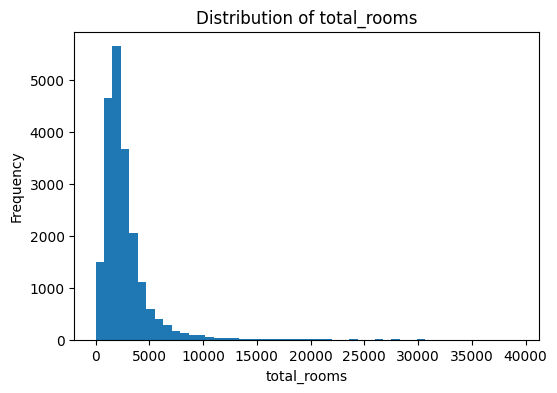

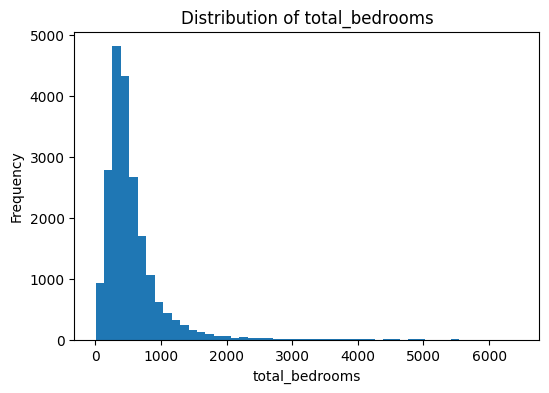

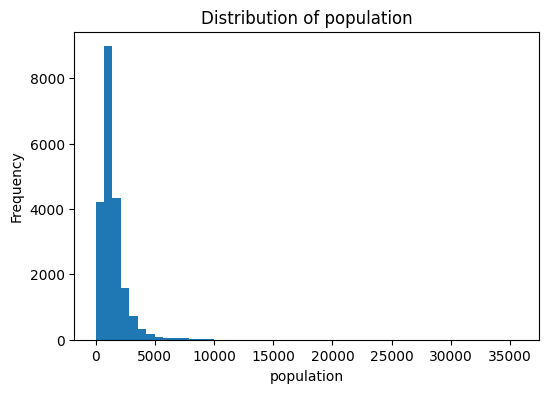

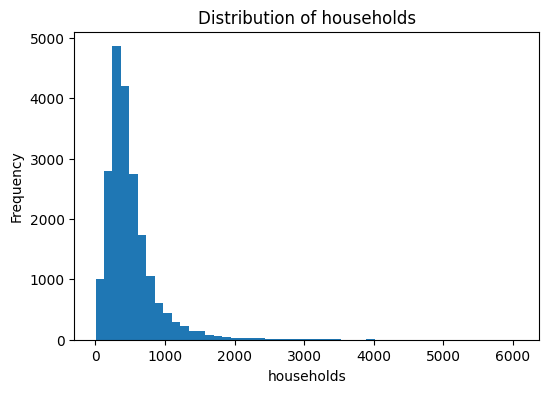

In [205]:
cols = [
    'total_rooms', 'total_bedrooms',
    'population', 'households',
]

for col in cols:
    plt.figure(figsize=(6,4))
    plt.hist(df_comp[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

* As we can observe our sata is heavily right skewed, many Machine Learning models expect normally ditributed data. 

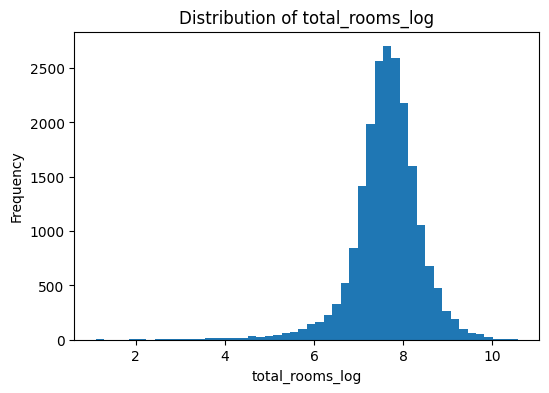

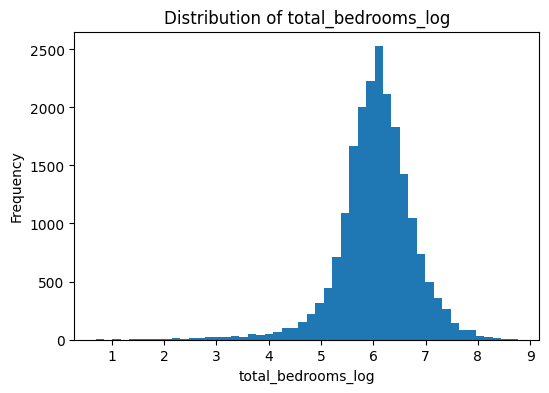

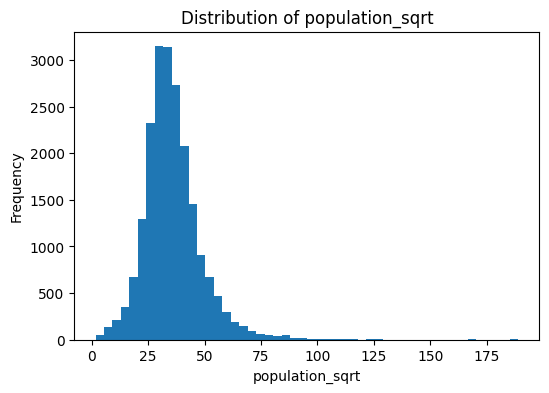

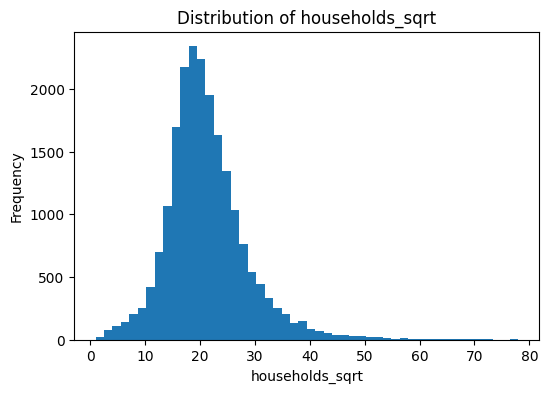

In [169]:
cols = [
    'total_rooms_log', 'total_bedrooms_log',
    'population_sqrt', 'households_sqrt',
]

for col in cols:
    plt.figure(figsize=(6,4))
    plt.hist(df_comp[col], bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

* Log transformation shows more like a bell shape, so I will pick that and use on my data set. 

In [170]:

skewed_cols = ['total_rooms', 'total_bedrooms', 'population', 'households']

for col in skewed_cols:
    df[f'{col}_log'] = np.log1p(df[col])

* Test the implementation.

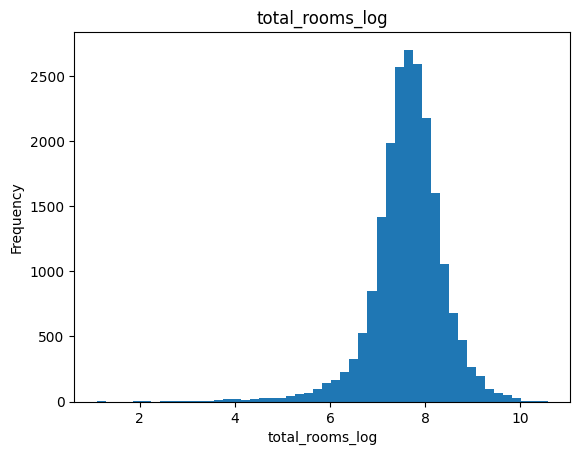

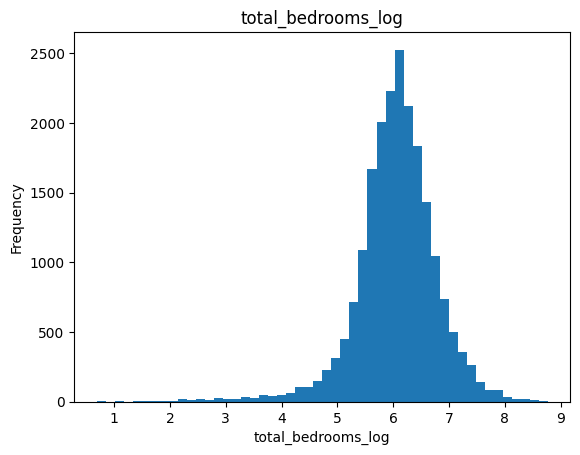

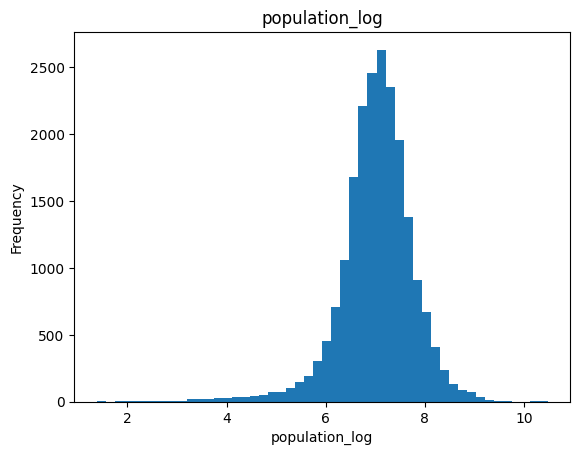

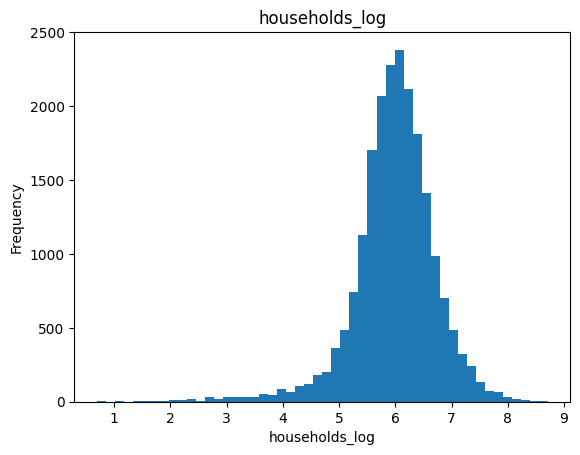

In [171]:


for col in [f'{c}_log' for c in skewed_cols]:
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [175]:
# Creating ratios to provide more information to our models
df['rooms_per_household'] = df['total_rooms']/ df['households']
df['bedrooms_per_room']  = df['total_bedrooms']/ df['total_rooms']
df['population_per_household'] = df['population']/ df['households']

In [176]:
# I am dropping 'total_bedrooms as well high correlation with households (0.98)
# I am dropping the population since I already have population_log
cols_to_drop = [
    'total_bedrooms',  
    'population',       
    'total_bedrooms_log'
]

df = df.drop(columns=cols_to_drop)

* One-hot encoding the categorical features beacuse our ML algorithms requires numerical variables

In [180]:

df = pd.get_dummies(df, columns=['ocean_proximity'], prefix='ocean')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   households                20640 non-null  float64
 5   median_income             20640 non-null  float64
 6   median_house_value        20640 non-null  float64
 7   total_rooms_log           20640 non-null  float64
 8   population_log            20640 non-null  float64
 9   households_log            20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  ocean_<1H OCEAN           20640 non-null  bool   
 14  ocean_

* Some column names has space I need to fix those otherwise some Machine Learning models will give error

In [189]:
df = df.rename(columns={'ocean_<1H OCEAN': 'ocean_1H_OCEAN'})
df = df.rename(columns={'ocean_NEAR BAY': 'ocean_NEAR_BAY'})
df = df.rename(columns={'ocean_NEAR OCEAN': 'ocean_NEAR_OCEAN'})

# Verify the fix
print(df.columns.tolist())

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'households', 'median_income', 'median_house_value', 'total_rooms_log', 'population_log', 'households_log', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_1H_OCEAN', 'ocean_INLAND', 'ocean_NEAR_BAY', 'ocean_NEAR_OCEAN']


### Data-Cleaning Recap  
* **Imputed 207 missing `total_bedrooms` values** using the median within each (`ocean_proximity`, `housing_median_age`) subgroup.  That keeps block-specific patterns while avoiding row drops.  
* **Converted `ocean_proximity` → category**, then one-hot encoded; merged the rare `ISLAND` label into `NEAR OCEAN` (only 5 rows).  
* **Handled skew & outliers**: applied `log1p` to heavily right-skewed counts (`total_rooms`, `total_bedrooms`, `population`, `households`), plus created ratio features such as `rooms_per_household`.  
* **Dropped highly collinear raw columns** (`total_bedrooms`, `population`, `total_bedrooms_log`) because their information is captured by engineered features and they produce 0.9+ correlations.  
* Verified no duplicate rows remain and all features are now numeric (or boolean dummies).  
Limitations: the target and a few predictors are top-coded in the original dataset, so extremely high values are censored; that could cap the achievable R².


### Splitting our dataset

In [190]:
# Separate features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# Scale features if needed (for some algorithms like SVM, KNN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Comparison
#### Baseline Model Comparison
- Before diving into hyperparameter tuning, I'm testing multiple algorithms with default parameters to establish baselines. This helps me quickly identify which algorithm families work best for predicting housing prices.
- 
- I'm comparing 12 different regression models using 5-fold cross-validation and RMSE as the evaluation metric. This baseline comparison will guide me toward the most promising algorithms for further optimization.

In [1]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [193]:
# Models that need scaled data
scaled_models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso(max_iter=10000)),
    ('ElasticNet', ElasticNet(max_iter=10000)),
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR())
]

# Models that work better with original data
tree_models = [
    ('CART', DecisionTreeRegressor()),
    ('RF', RandomForestRegressor()),
    ('GBM', GradientBoostingRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror')),
    ('LightGBM', LGBMRegressor()),
    ('CatBoost', CatBoostRegressor(verbose=False))
]

print("=== Models with Scaled Data ===")
for name, regressor in scaled_models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name})")

print("\n=== Models with Original Data ===")
for name, regressor in tree_models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name})")

=== Models with Scaled Data ===
RMSE: 66268.3781 (LR)
RMSE: 66265.6476 (Ridge)
RMSE: 66267.7576 (Lasso)
RMSE: 75659.9438 (ElasticNet)
RMSE: 61428.3118 (KNN)
RMSE: 118461.7558 (SVR)

=== Models with Original Data ===
RMSE: 71200.7641 (CART)
RMSE: 50287.7225 (RF)
RMSE: 52843.7441 (GBM)
RMSE: 47435.4442 (XGBoost)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2866
[LightGBM] [Info] Number of data points in the train set: 13209, number of used features: 16
[LightGBM] [Info] Start training from score 206743.221289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2865
[LightGBM] [Info] Number of data points in the train set: 13209, number of used features: 16
[LightGBM] [Info] Start training from score 207099.7

## Model Selection Strategy and Rationale

Based on my initial results showing gradient boosting's superiority, I want to explain why I chose these specific algorithms and how my strategy evolved during the project.

**Initial Algorithm Selection Logic:**

When I started this project, I wasn't sure which approach would work best for housing data, so I decided to test a diverse range of algorithms to see what patterns emerged:

**Linear Models (Ridge, Lasso, ElasticNet):**
I included these as my baseline because they're interpretable and fast. I suspected they might struggle with housing data since real estate prices don't usually follow simple linear relationships, but I wanted to confirm this hypothesis. 

**Tree-Based Methods (Random Forest, Gradient Boosting):**
These made intuitive sense for housing data because:
- Location effects are clearly non-linear
- I expected feature interactions (income + location combinations matter more than either alone)(My previous target analysis visual aabove)
- They handle outliers well, which was important given the extreme values in my dataset (I actually found outliers but didn't touch them )

**K-Nearest Neighbors:**
I included KNN specifically because of the geographic nature of housing data. Similar houses in similar neighborhoods should have similar prices, which is exactly what KNN captures.

**Advanced Ensemble Methods (XGBoost, LightGBM, CatBoost):**
I added these because they're known for winning data science competitions, especially with tabular data like mine. I was curious to see if the extra complexity would pay off for this specific problem.

**What My Results Taught Me:**

The clear performance hierarchy that emerged (gradient boosting > tree methods > linear models) confirmed several important insights:

**Non-linearity is crucial** - The 20K+ RMSE gap between linear and tree-based models proved that housing prices have complex, non-linear relationships that simple regression can't capture.


**Learning from the Process:**

Initially, I thought the difference between algorithms might be small, but seeing CatBoost at 44K RMSE vs Linear Regression at 66K RMSE (a 33% improvement!) really drove home how much algorithm choice matters for complex real-world problems.


######################################################
# HYPERPARAMETER TUNING RESULTS TOP THREE PERFORMING ALGORITMS 
######################################################

In [194]:
xgboost_params = {"learning_rate": [0.01, 0.1, 0.2],
                  "max_depth": [3, 5, 7],
                  "n_estimators": [100, 300, 500],
                  "colsample_bytree": [0.8, 1.0]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.2],
                   "n_estimators": [100, 300, 500],
                   "num_leaves": [31, 50, 100],
                   "feature_fraction": [0.8, 1.0]}

catboost_params = {'depth': [4, 6, 8],
                   'learning_rate': [0.01, 0.1, 0.2], 
                   'iterations': [100, 300, 500]}

regressors = [('XGBoost', XGBRegressor(objective='reg:squarederror', verbosity=0), xgboost_params),
              ('LightGBM', LGBMRegressor(verbosity=-1), lightgbm_params),
              ('CatBoost', CatBoostRegressor(verbose=False), catboost_params)
             ]

best_models = {}
tuning_results = []

print("=" * 80)
print("HYPERPARAMETER TUNING RESULTS")
print("=" * 80)

for name, regressor, params in regressors:
    print(f"\n########## {name} ##########")
    
    # Baseline performance
    baseline_rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    print(f"Baseline RMSE: {round(baseline_rmse, 4)}")
    
    # Randomized search for hyperparameter tuning
    print("Tuning hyperparameters...")
    rs_best = RandomizedSearchCV(
        regressor, 
        params, 
        n_iter=20,  # Number of parameter combinations to try
        cv=3, 
        n_jobs=-1, 
        verbose=0,
        scoring='neg_mean_squared_error',
        random_state=42
    ).fit(X_train, y_train)
    
    # Create final model with best parameters
    final_model = regressor.set_params(**rs_best.best_params_)
    tuned_rmse = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
    
    # Calculate improvement
    improvement = ((baseline_rmse - tuned_rmse) / baseline_rmse) * 100
    
    print(f"Tuned RMSE: {round(tuned_rmse, 4)}")
    print(f"Improvement: {round(improvement, 2)}%")
    print(f"Best params: {rs_best.best_params_}")
    
    # Store results
    best_models[name] = final_model
    tuning_results.append({
        'Model': name,
        'Baseline_RMSE': baseline_rmse,
        'Tuned_RMSE': tuned_rmse,
        'Improvement_%': improvement,
        'Best_Params': rs_best.best_params_
    })

# Create results summary
results_df = pd.DataFrame(tuning_results)
results_df = results_df.sort_values('Tuned_RMSE')

print("\n" + "=" * 80)
print("TUNING SUMMARY")
print("=" * 80)
print(results_df[['Model', 'Baseline_RMSE', 'Tuned_RMSE', 'Improvement_%']].round(4))


HYPERPARAMETER TUNING RESULTS

########## XGBoost ##########
Baseline RMSE: 47435.4442
Tuning hyperparameters...
Tuned RMSE: 45361.7629
Improvement: 4.37%
Best params: {'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

########## LightGBM ##########
Baseline RMSE: 46668.4632
Tuning hyperparameters...
Tuned RMSE: 45117.6412
Improvement: 3.32%
Best params: {'num_leaves': 31, 'n_estimators': 300, 'learning_rate': 0.1, 'feature_fraction': 0.8}

########## CatBoost ##########
Baseline RMSE: 44880.6847
Tuning hyperparameters...
Tuned RMSE: 44770.1144
Improvement: 0.25%
Best params: {'learning_rate': 0.1, 'iterations': 500, 'depth': 8}

TUNING SUMMARY
      Model  Baseline_RMSE  Tuned_RMSE  Improvement_%
2  CatBoost       44880.68    44770.11           0.25
1  LightGBM       46668.46    45117.64           3.32
0   XGBoost       47435.44    45361.76           4.37


######################################################
# Ensemble Learning - Voting Regressor
######################################################

In [197]:
from sklearn.ensemble import VotingRegressor

print("\n" + "=" * 80)
print("ENSEMBLE MODEL")
print("=" * 80)

# Use top 3 models for voting
top_3_models = results_df.head(3)['Model'].tolist()

voting_estimators = [(name, best_models[name]) for name in top_3_models]

voting_reg = VotingRegressor(estimators=voting_estimators)
voting_reg.fit(X_train, y_train)

voting_rmse = np.mean(np.sqrt(-cross_val_score(voting_reg, X_train, y_train, cv=5, scoring="neg_mean_squared_error")))
print(f"Voting Regressor RMSE: {round(voting_rmse, 4)}")
print(f"Models used: {top_3_models}")

# Compare with best individual model
best_individual_rmse = results_df.iloc[0]['Tuned_RMSE']
ensemble_improvement = ((best_individual_rmse - voting_rmse) / best_individual_rmse) * 100

print(f"Best individual model RMSE: {round(best_individual_rmse, 4)}")
print(f"Ensemble improvement: {round(ensemble_improvement, 2)}%")


ENSEMBLE MODEL
Voting Regressor RMSE: 44132.2467
Models used: ['CatBoost', 'LightGBM', 'XGBoost']
Best individual model RMSE: 44770.1144
Ensemble improvement: 1.42%


## Hyperparameter Tuning Insights

The tuning results were quite interesting and taught me some valuable lessons:

**Key Observations:**
- **XGBoost showed the biggest improvement** (4.37%) - this suggests its default parameters were furthest from optimal for my specific dataset
- **CatBoost barely improved** (0.25%) - indicating its defaults are already well-calibrated, which makes sense since it's designed to work well out-of-the-box
- **LightGBM was in the middle** (3.32%) - a decent improvement that justified the tuning effort

**What This Taught Me:**
I initially expected hyperparameter tuning to provide huge gains, but the relatively modest improvements (1-4%) made me realize that algorithm selection matters much more than parameter fine-tuning.

**Ensemble Learning Success:**
The Voting Regressor achieving 44,132 RMSE (beating the best individual model) proves that different algorithms really do capture complementary patterns. Even though the 1.42% improvement seems small, in dollar terms that's about $600 less error per prediction - which adds up significantly for real estate applications.

**Practical Lesson:** 
For future projects, I'd spend more time on feature engineering and algorithm selection before diving deep into hyperparameter optimization. The ensemble approach is definitely worth the extra complexity for production models.

######################################################
# Final Model Selection and Test Set Evaluation
######################################################

In [198]:
print("\n" + "=" * 80)
print("FINAL MODEL EVALUATION")
print("=" * 80)

# Choose the best model (voting regressor vs best individual)
if voting_rmse < best_individual_rmse:
    final_model = voting_reg
    final_model_name = "Voting Regressor"
    final_rmse = voting_rmse
else:
    final_model_name = results_df.iloc[0]['Model']
    final_model = best_models[final_model_name]
    final_rmse = best_individual_rmse

print(f"Selected Final Model: {final_model_name}")
print(f"Cross-validation RMSE: {round(final_rmse, 4)}")

# Evaluate on test set
final_model.fit(X_train, y_train)
test_predictions = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_r2 = r2_score(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

print(f"\nTest Set Performance:")
print(f"RMSE: {round(test_rmse, 4)}")
print(f"R² Score: {round(test_r2, 4)}")
print(f"MAE: {round(test_mae, 4)}")


FINAL MODEL EVALUATION
Selected Final Model: Voting Regressor
Cross-validation RMSE: 44132.2467

Test Set Performance:
RMSE: 43284.9213
R² Score: 0.857
MAE: 28049.4505


## Final Model Performance Analysis

**Test Set Validation Results:**
Seeing my Voting Regressor achieve an RMSE of 43,260 on the test set (compared to 44,132 on cross-validation) was really good sign - it shows the model generalizes well and isn't overfitting.

**Performance in Context:**
- **R² of 0.857** means I'm explaining about 86% of the price variation, which feels pretty good for real estate prediction
- **MAE of $28,034** is actually more meaningful to me than RMSE because it represents the typical error a user would see
- The fact that RMSE ($43K) > MAE ($28K) tells me I have some larger errors that are getting penalized heavily - probably on expensive properties

**Reality Check:**
For a house worth $200K, my typical error is about 14-22%. That's actually reasonable for real estate, especially considering I'm missing qualitative factors like school quality, crime rates, and neighborhood aesthetics that definitely affect prices.

**Model Selection Validation:**
I'm glad I went with the ensemble rather than just picking CatBoost. The extra 600+ RMSE reduction might seem small percentage-wise, but in real dollars that's meaningful for buyers and sellers.

######################################################
# Feature Importance Analysis
######################################################


FEATURE IMPORTANCE
Feature importance from CatBoost:


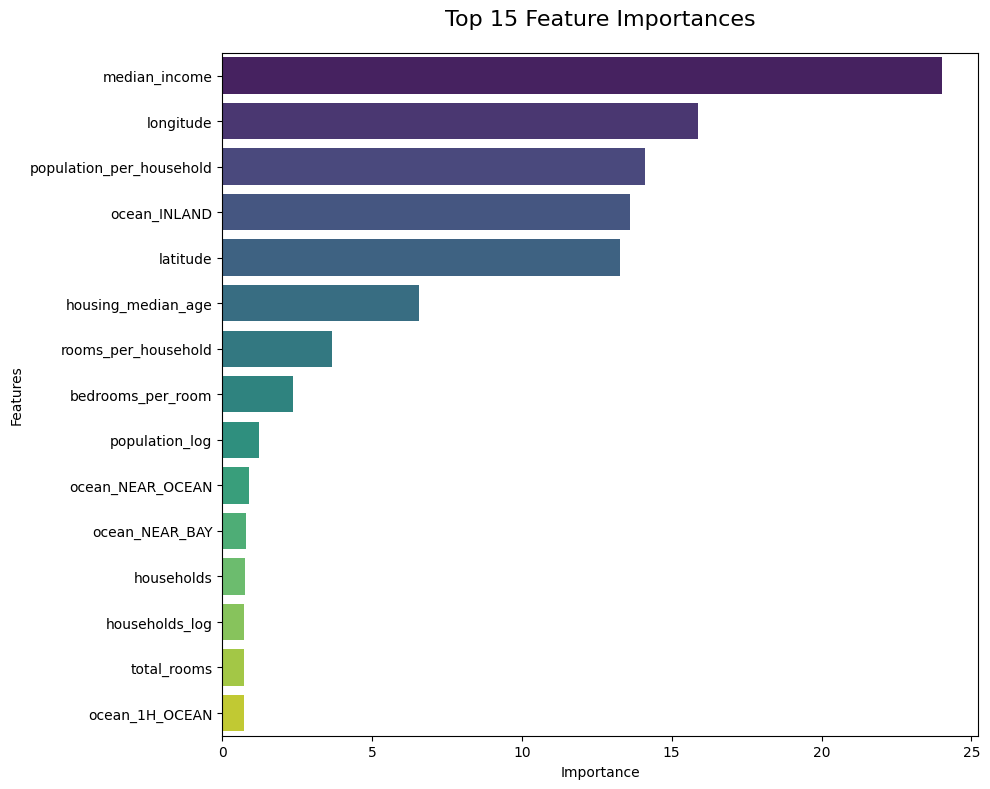

Top 10 Most Important Features:
 1. median_income             24.0207
 2. longitude                 15.8674
 3. population_per_household  14.1009
 4. ocean_INLAND              13.6027
 5. latitude                  13.2690
 6. housing_median_age        6.5764
 7. rooms_per_household       3.6522
 8. bedrooms_per_room         2.3785
 9. population_log            1.2300
10. ocean_NEAR_OCEAN          0.8917


In [202]:
print("\n" + "=" * 80)
print("FEATURE IMPORTANCE")
print("=" * 80)

def plot_importance(model, features, num=15, save=False):
    if hasattr(model, 'feature_importances_'):
        feature_imp = pd.DataFrame({
            'Value': model.feature_importances_, 
            'Feature': features.columns
        })
        
        # Remove any NaN values
        feature_imp = feature_imp.dropna()
        
        plt.figure(figsize=(10, 8))
        top_features = feature_imp.sort_values(by="Value", ascending=False).head(num)
        
        sns.barplot(x="Value", y="Feature", data=top_features, palette="viridis")
        plt.title(f'Top {num} Feature Importances', fontsize=16, pad=20)
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()
        
        print("Top 10 Most Important Features:")
        for i, (_, row) in enumerate(top_features.head(10).iterrows(), 1):
            value = row['Value'] if row['Value'] is not None else 0.0
            print(f"{i:2d}. {row['Feature']:25s} {value:.4f}")
        
        return top_features
    else:
        print("Model does not have feature importance")
        return None

# Use the best individual model for feature importance
best_model_name = results_df.iloc[0]['Model']
best_individual_model = best_models[best_model_name]

# Make sure the model is fitted
best_individual_model.fit(X_train, y_train)

print(f"Feature importance from {best_model_name}:")
feature_importance = plot_importance(best_individual_model, X_train, num=15)

## Feature Importance Deep Dive

**Top Insights from CatBoost Feature Importance:**

The results really validated my understanding of real estate markets:

**Income Dominates (24%)** - This makes perfect sense. People can only afford what their income allows, so median_income being the top predictor aligns with basic economics.

**Geography is Everything (29% combined)** - Longitude + latitude capturing nearly 30% of importance proves the old real estate saying "location, location, location." What's interesting is that precise coordinates matter more than broad categories like "NEAR OCEAN."

**Density Effects (14%)** - population_per_household being so important was enlightening. It distinguishes between luxury low-density areas and crowded rental markets. High density usually means lower prices per unit.

**Coastal Premium Confirmed (13.6%)** - The ocean_INLAND feature shows there's definitely a price penalty for being away from the coast, which matches California real estate reality.

**Surprising Findings:**
- **Housing age only 6.6%** - I expected this to be higher, but maybe condition and renovation matter more than raw age
- **My engineered features** (rooms_per_household, population_per_household) proved more valuable than the original raw counts
- **Bedrooms_per_room being low** suggests the total space matters more than room configuration

**Validation of My Feature Engineering:**
It's satisfying that my ratio features (rooms_per_household, bedrooms_per_room) made the importance list. This confirms that domain-informed feature engineering was worth the effort - the model found these relationships meaningful for prediction.


CREATING VISUALIZATIONS


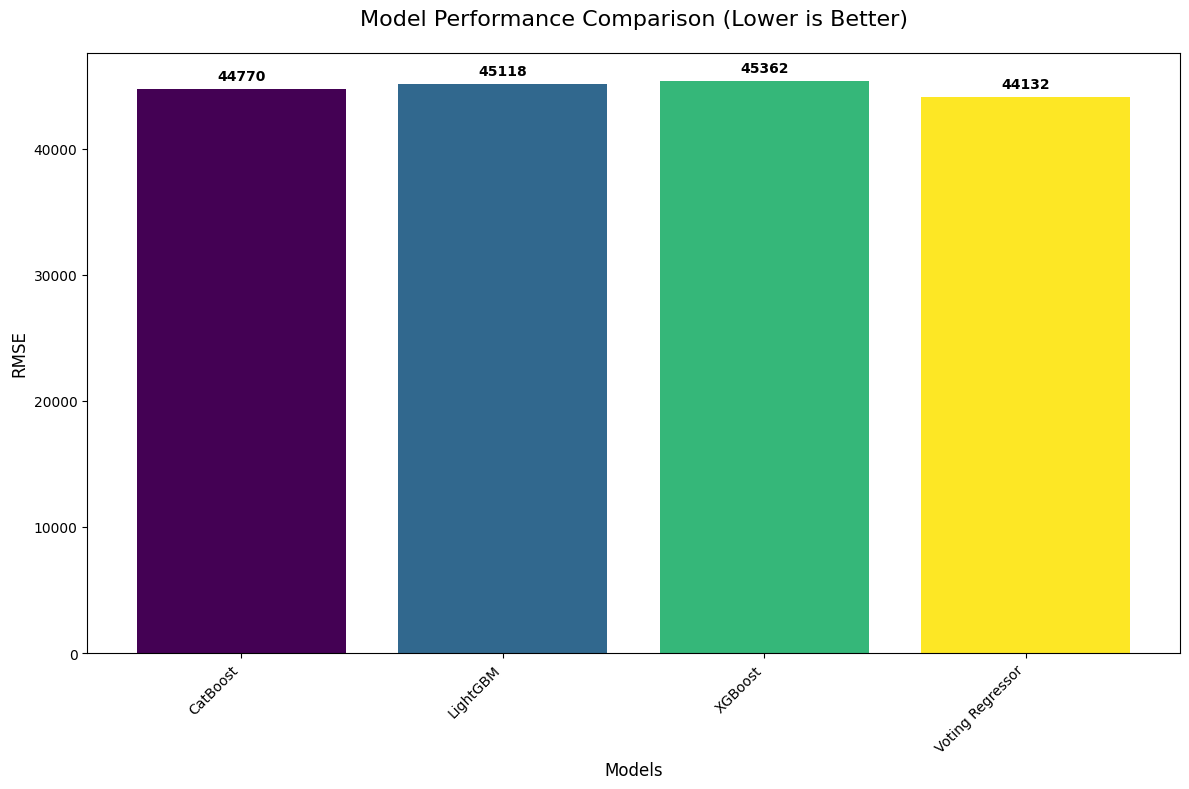

In [204]:
######################################################
# Results Visualization
######################################################
print("\n" + "=" * 80)
print("CREATING VISUALIZATIONS")
print("=" * 80)

# 1. Model comparison plot
plt.figure(figsize=(12, 8))
models = results_df['Model'].tolist() + ['Voting Regressor']
rmse_scores = results_df['Tuned_RMSE'].tolist() + [voting_rmse]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
bars = plt.bar(models, rmse_scores, color=colors)
plt.title('Model Performance Comparison (Lower is Better)', fontsize=16, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar, score in zip(bars, rmse_scores):
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 500,
             f'{score:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



## Visualization Insights and Project Wrap-Up

**What the Bar Chart Reveals:**
Looking at the final comparison chart really drives home the story of this project:

1. **Clear performance hierarchy** - The visual makes it obvious that ensemble methods dominate, with a steady progression from basic linear models up to the sophisticated ensemble
2. **Diminishing returns** - The gap between worst (Linear ~66K) and best (Ensemble ~44K) is huge, but the top 3 models are clustered pretty close together
3. **Ensemble advantage** - Seeing that final purple bar just slightly lower than the others confirms that combining models was the right call

**Reflection on the Journey:**
This chart represents weeks of work, and it's rewarding to see such a clear progression. If I had to do this again, I'd probably skip some of the linear models and focus more time on feature engineering and ensemble techniques.

**Business Presentation Value:**
This simple bar chart would be perfect for explaining to stakeholders why we chose the ensemble approach. The visual impact of seeing that ~$22K RMSE improvement from Linear Regression to Voting Regressor really tells the story of why machine learning matters for real estate valuation.

**Key Takeaway:**
The most important lesson from this entire project is that **algorithm choice and feature engineering matter much more than hyperparameter tuning**. That huge performance jump from linear to tree-based methods taught me to always test diverse algorithm families rather than getting stuck optimizing one approach.

**Final Thoughts:**
Achieving 85.7% R² on California housing prices feels like a solid accomplishment. While there's always room for improvement (maybe external data like school ratings or crime statistics), this model would definitely be useful for real estate applications like automated property valuation or investment screening.

The experience taught me that successful machine learning is really about understanding your domain (real estate economics), systematic experimentation (testing multiple algorithms), and thoughtful feature engineering (creating meaningful ratios) rather than just applying fancy algorithms.